# World Happiness Index

The World Happiness Index is a survey of the global state of happiness. The first report was published in the year 2012 and subsequently till 2019. This survey ranks 155 out of 195 countries.

Instead of the actual values, the data here indicates how much a feature contributes to the happiness score.

The features that are used in the dataset are : 
 1.   Country                       
 2.   Score                         
 3.   GDP per capita                
 4.   Social support                
 5.   Healthy life expectancy       
 6.   Freedom to make life choices  
 7.   Generosity                    
 8.   Perceptions of corruption
 9.   Rank

However the survey does not contain details about countries like North Korea and Turkmenistan. North Korea and Turkmenistan have strict dictatorship and censorship and have state sponsored propaganda. 

Getting data about countries like these might be an interesting one but on the other hand extremely difficult to collect it.

The main aim of this dataset is to see whether a country's form of government have any effect on the country's happiness index.


The dataset :

https://www.kaggle.com/unsdsn/world-happiness

https://www.cia.gov/library/publications/the-world-factbook/fields/299.html


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('/content/2019.csv')

**Simple preprocessing and cleaning :**

In [ ]:
df.head()


,rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   rank                          156 non-null    int64  
 1   Country                       156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
df.describe()


,rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [ ]:
for i in df.columns: 
    print(i) 

rank
Country
Score
GDP per capita
Social support
Healthy life expectancy
Freedom to make life choices
Generosity
Perceptions of corruption


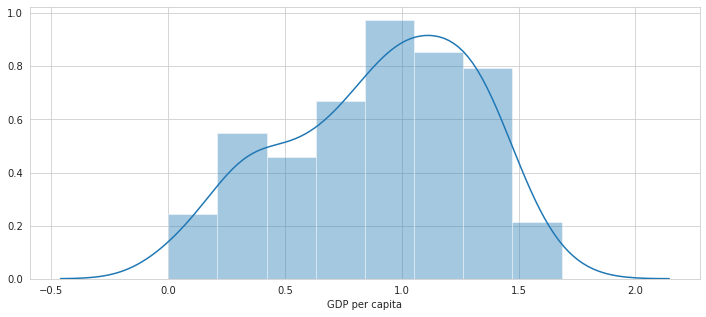

In [ ]:
# distribution of the GDP per capita across rank
plt.figure(figsize=(12,5))
sns.distplot(df['GDP per capita'])


Exploring the distribution of the GDP per capita across the ranks, higher the GDP the more contribution it does to the Happiness rank. We can see it has an unimodel distribution

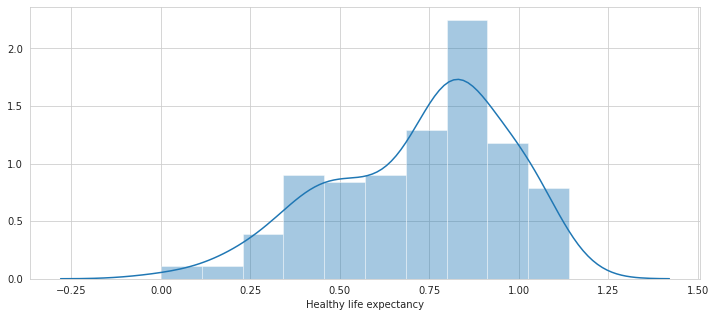

In [ ]:
#exploring healthy life expectancy across different ranks
plt.figure(figsize=(12,5))
sns.distplot(df['Healthy life expectancy'])

We can also see that there is an unimodel distribution for healthy life expectancy across the ranks.

It would be interesting to see if there is any relation among the distributions

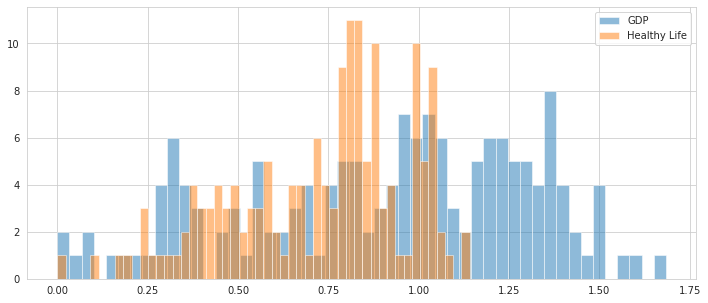

'healthy life score contributes more to a country to a happiness whereas this is not the case for gdp score of a country.'

In [ ]:
#overlaying gdp and happiness


#lower gdp indiacates that the countries's gdp has lower contribution
# healthy life score contributes more to the happiness 
plt.figure(figsize=(12,5))
plt.hist(df['GDP per capita'],bins=50,alpha=0.5,label='GDP')
plt.hist(df['Healthy life expectancy'],bins=50,alpha=0.5,label='Healthy Life')
plt.legend(loc='best')
plt.show()

'''healthy life score contributes more to a country to a happiness whereas this is not the case for gdp score of a country.'''

We can see there isn't any strong relation in the GDP of a country and its healthy life

The countries with high GDP score have lower healthy life score. However this observation doesn't hold true in all the case and there are many outliners

I wanted to explore the countries with higher generosity index and their ranks

In [ ]:
df.nlargest(5, ['Generosity']) 
# Countries with lower ranks have higher ranks

,rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
130,131,Myanmar,4.360,0.710,1.181,0.555,0.525,0.566,0.172
91,92,Indonesia,5.192,0.931,1.203,0.660,0.491,0.498,0.028
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
21,22,Malta,6.726,1.300,1.520,0.999,0.564,0.375,0.151
120,121,Kenya,4.509,0.512,0.983,0.581,0.431,0.372,0.053


From the table above, the countries having higher generosity have lower ranks but we cannot firmly conclude that generosity have any negative relation to the happiness score.

In [ ]:
# adding the form of government to the countries using left- inner join of the dataset 


Now let us explore the happiness score among the different forms of government and if there is any relation among them.

In [ ]:
df1=pd.read_csv('/content/2019.csv')
df2=pd.read_csv('/content/government.csv')

In [ ]:
data=pd.merge(df1,df2,how='inner',on='Country')

In [ ]:
data.head()

,rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Government_type
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,parliamentary republic
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,parliamentary constitutional monarchy
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,parliamentary constitutional monarchy
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,unitary parliamentary republic
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,parliamentary constitutional monarchy; part of...


In [ ]:
data.isnull().sum()

rank                            0
Country                         0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Government_type                 0
dtype: int64

In [ ]:
print(df.shape)
print(data.shape)

(156, 9)
(144, 10)


In [ ]:
data.groupby('Government_type').sum()

,rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Government_type,,,,,,,,
"Republic of Cyprus - presidential republic; ""Turkish Republic of Northern Cyprus"" (self-declared) - parliamentary republic with enhanced presidency",49,6.046,1.263,1.223,1.042,0.406,0.190,0.041
absolute monarchy,57,12.749,3.087,2.670,1.666,0.994,0.300,0.299
communist party-led state,93,5.191,1.029,1.125,0.893,0.521,0.058,0.100
communist state,199,9.971,1.505,2.376,1.402,1.090,0.413,0.237
constitutional federal republic,19,6.892,1.433,1.457,0.874,0.454,0.280,0.128
constitutional monarchy,198,24.379,4.834,5.577,3.315,2.076,1.178,0.621
constitutional monarchy (emirate),51,6.021,1.500,1.319,0.808,0.493,0.142,0.097
federal parliamentary constitutional monarchy,80,5.339,1.221,1.171,0.828,0.508,0.260,0.024
federal parliamentary democracy (Parliament of Canada) under a constitutional monarchy; a Commonwealth realm; federal and state authorities and responsibilities regulated in constitution,9,7.278,1.365,1.505,1.039,0.584,0.285,0.308


**Preprocessing of the new data frame :**

In [ ]:
def preprocess(text):
  head, sep, tail = text.partition(';')
  return head

In [ ]:
data['Government_type']=data['Government_type'].apply(preprocess)

In [ ]:
data['Government_type'].unique()

array(['parliamentary republic', 'parliamentary constitutional monarchy',
       'unitary parliamentary republic',
       'federal republic (formally a confederation)',
       'parliamentary democracy\xa0under a constitutional monarchy',
       'federal parliamentary democracy (Parliament of Canada) under a constitutional monarchy',
       'federal parliamentary republic',
       'federal parliamentary democracy\xa0under a constitutional monarchy',
       'presidential republic', 'parliamentary democracy',
       'constitutional monarchy',
       'federal parliamentary democracy under a constitutional monarchy',
       'constitutional federal republic', 'federation of monarchies',
       'federal presidential republic', 'semi-presidential republic',
       'absolute monarchy', 'Republic of Cyprus - presidential republic',
       'constitutional monarchy (emirate)',
       'parliamentary democracy (Parliament) under a constitutional monarchy',
       'semi-presidential federation', 'in 

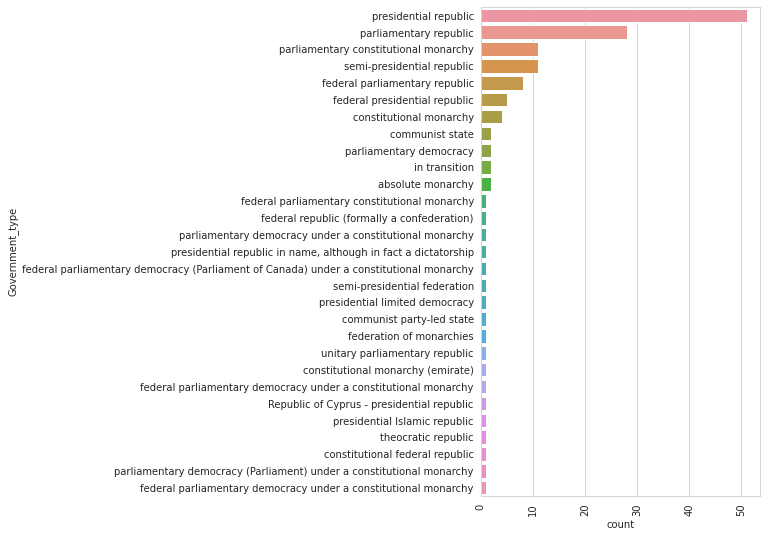

In [ ]:
plt.figure(figsize=(5,9))
plt.xticks(rotation=90)
sns.countplot(y='Government_type',data=data,order = data['Government_type'].value_counts().index)

In [ ]:
transition=data[data['Government_type']=='in transition']
transition.head()


#transitional countries have negative correlation with contributing factors of happiness
#there are only two countries in transitional state in this dataset

,rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Government_type
67,72,Libya,5.525,1.044,1.303,0.673,0.416,0.133,0.152,in transition
138,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,in transition


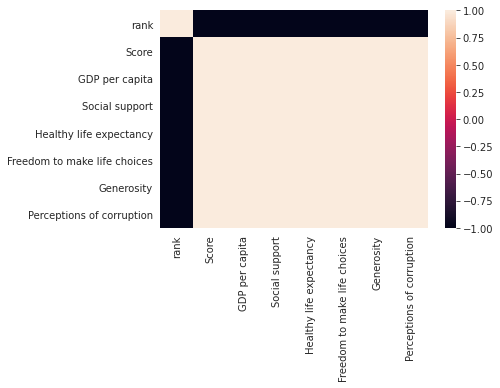

In [ ]:
sns.heatmap(transition.corr())

In transition the countries , as expected , due to the internal turmoil there isn't much relation with happiness scores and the feature. 

Now, let us explore the correlation among country's presidential republic.

In [ ]:
presidentialrep=data[data['Government_type']=='presidential republic']
presidentialrep.head()


,rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Government_type
11,12,Costa Rica,7.167,1.034,1.441,0.963,0.558,0.144,0.093,presidential republic
24,26,Chile,6.444,1.159,1.369,0.920,0.357,0.187,0.056,presidential republic
25,27,Guatemala,6.436,0.800,1.269,0.746,0.535,0.175,0.078,presidential republic
29,31,Panama,6.321,1.149,1.442,0.910,0.516,0.109,0.054,presidential republic
31,33,Uruguay,6.293,1.124,1.465,0.891,0.523,0.127,0.150,presidential republic


The countries above mentioned are the top 5 in the presidential republic list and the below mentioned are the last 5 positions in the list.

In [ ]:
presidentialrep.tail()



,rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Government_type
137,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089,presidential republic
139,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,presidential republic
140,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,presidential republic
142,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,presidential republic
143,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091,presidential republic


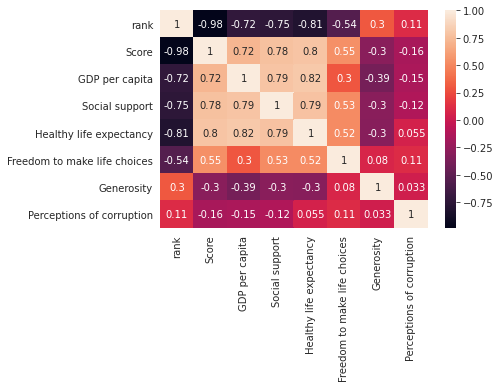

In [ ]:
sns.heatmap(presidentialrep.corr(),annot=True)


#presidentital republic also have a higher ranks

We can see that the countries under presidential republic also have varied correlation. There is positive corelation among GDP , Social Support , Life expectancy , freedom of choices to the happiness score. There is negative correlation with Generosity and Perception of Corruption

If we check the countries with higher ranks under presidential republic form of government , we can see that countries with higher ranks have the following features
* The constitution provides for free and compulsory  education. The central government oversees school attendance, curriculum , and other educational matters.
* Costa Rica provides universal health care to its citizens and permanent residents. Costa Rica offers some of the best health care in Latin America
* Healthcare in Panama is provided through a system through the government and a private sector. The public sector is funded through the Ministerio de Salud, (MINSA) and the Social Security Fund (Caja de Seguro Social), which operate separate facilities. However it is not universally accesible especially in the country side.
* Uruguay apart from private treatment also provides free treatment to lower income people.

Let's take a look at the countries that have lower ranks under presidentital republic

* South Sudan suffers from internal political and ethinical conflicts
* South Sudan has been ranked the most corrupt country in East Africa followed by Burundi. Kenya and Uganda tie in third position, according to latest Corruption Perception Index 2019 report published by Transparency International.

* According to the paper Effect of corruption on perceived difficulties in healthcare access in sub-Saharan Africa
it is concluded that bribery is a potential barrier in these regions. 




link: http://info8.juridicas.unam.mx/cont/mlawr/8/arc/arc3.htm

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0220583
https://www.britannica.com/place/Costa-Rica/Health-and-welfare

In [ ]:
pcm=data[data['Government_type']=='parliamentary constitutional monarchy']
pcm.head()

,rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Government_type
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,parliamentary constitutional monarchy
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,parliamentary constitutional monarchy
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,parliamentary constitutional monarchy
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,parliamentary constitutional monarchy
14,15,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278,parliamentary constitutional monarchy



The countries mentioned above and below are the top and bottom five countries under parliamentry monarchy


In [ ]:
pcm.tail()

,rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Government_type
54,58,Japan,5.886,1.327,1.419,1.088,0.445,0.069,0.140,parliamentary constitutional monarchy
84,89,Morocco,5.208,0.801,0.782,0.782,0.418,0.036,0.076,parliamentary constitutional monarchy
95,101,Jordan,4.906,0.837,1.225,0.815,0.383,0.110,0.130,parliamentary constitutional monarchy
102,109,Cambodia,4.700,0.574,1.122,0.637,0.609,0.232,0.062,parliamentary constitutional monarchy
131,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093,parliamentary constitutional monarchy


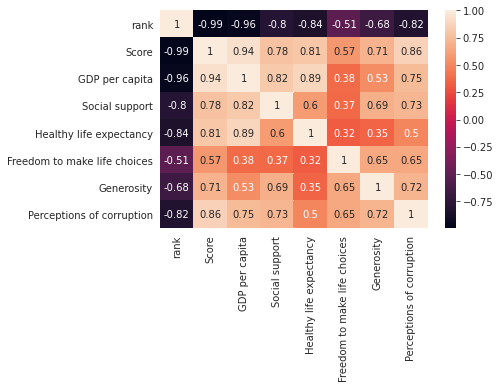

In [ ]:
sns.heatmap(pcm.corr(),annot=True)

#not only constitutional monarchy have higher ranks

For countries under constitutional monarchy features have positive correlation with the happiness score. These countries have performed better than the countries with other government forms.

This can be attributed to the fact that :

* they have protected human rights policy
* the health care is universally accessible and is often supported by the government for its citizens
* They have better social welfare system where they have free education. These nations also spend most of their GDP in social welfare.

As for the countries that have lower ranks , in comparatively , under parliamentary constitutional monarchy 

* Japan has world class innovation and social welfare system 
* The other countries in the bottom half are Morocco, Jordan ,Cambodia, Lesotho 

Let us explore the corruption , universal access to health care and education in the above mentioned countries 

* Total healthcare expenditures account for approximately 6% of Cambodia’s GDP and is increasing in the country’s high-growth economy
* Though Education was better in late 1950's but was wiped clean by khmer rouge and forced to rebuild.
* In Morocco the education is free until 16 years of age however is not accessible in the rural areas especially for girls
* Most of the country's voluntary social welfare societies are subsidized by the government and coordinated by the central and regional offices of the National Mutual Aid Society
* The occurrence of petty and grand corruption in public and private sectors in Morocco are one of the socio-political challenges the country is facing
* Corruption is also identified by businesses as a large obstacle for investment in Morocco. Public procurement is an area with a high level of corruption, and government contracts are often awarded to well-connected companies.  

In [ ]:
absmonch=data[data['Government_type']=='absolute monarchy']
absmonch.head()
#there are only two countries in this dataset that fall under absolute monarchy

,rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Government_type
26,28,Saudi Arabia,6.375,1.403,1.357,0.795,0.439,0.08,0.132,absolute monarchy
27,29,Qatar,6.374,1.684,1.313,0.871,0.555,0.22,0.167,absolute monarchy


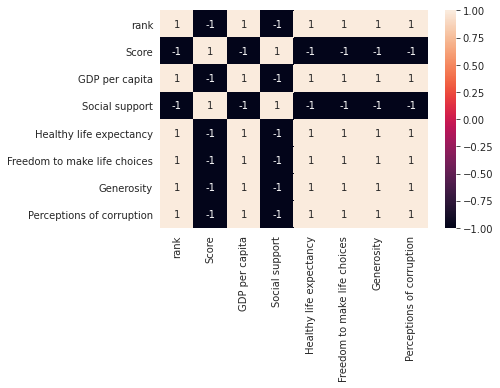

In [ ]:
sns.heatmap(absmonch.corr(),annot=True)

#there's positive and negative correlation with the features to the score in the case of absolute monarchy

Countries under absolute monarchy , though have ranks in 20's , is strongly attributed to the Social support offered by the government to the people. We can also see that countries under absolute monarchy also includes Qatar and Saudi Arabia. 

The better social support can be attributed to the fact that :

* The Saudi health care network provides free care to the general public and some of the most sophisticated specialized care available anywhere in the world.
* The government also sponsors a wide range of social services programs aimed at ensuring that every citizen has a decent standard of living.
* Today, Saudis have access to a national network of thousands of hospitals and clinics, and can obtain virtually any specialized medical treatment they might need in the Kingdom.
* Sophisticated surgical procedures such as open heart surgery and organ transplants are routinely performed in Saudi hospitals by medical professionals that meet the highest international standards. One area of particular note is the success in separating conjoined twins by medical teams at a number of National Guard hospitals.
* In addition, Saudis medications are readily available to patients at a low cost thanks to subsidies from the government. Saudi companies are also encouraged to manufacture pharmaceuticals.


However if we consider the nations like Brunei out of this dataset,  the country restricted travel movements among induviduals and repressive in nature. The people are under poverty. Let us also consider Eshwati formerly known as Swaziland

* There are four government-run hospitals in Brunei, one for every district. There are also 16 health centres and 10 health clinics.
* There are are many reports fraud and corruption in both brunei and Eshwati



Read more :https://www.saudiembassy.net/health-social-services

https://www.psa.gov.qa/en/knowledge/Doc/Studies/Promoting_QNV2030_Vision_of_a_Good_Society_Towards_a_Social_Policy_for_Qatar_2009_EN.pdf

We can see that the policy held implemented by the government and presence of resources also contributes to the happiness score. So in the next analysis , we shall look at mean ranking of each form of governement. 